<a href="https://colab.research.google.com/github/santosh-kumar8367/EDA/blob/main/EDA_for_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Importing All the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Loading the data
df =pd.read_csv('/content/Train.csv')
print("shape of dataset : ",df.shape)

shape of dataset :  (10999, 12)


In [66]:
#First five rows of dataset
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [67]:
#check for null values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [68]:
#categerical and continous columns in data
cat_cols = ['Warehouse_block','Mode_of_Shipment','Gender ','Product_importance ','Reached.on.Time_Y.N']
con_cols = ["Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)

The categorial cols are :  ['Warehouse_block', 'Mode_of_Shipment', 'Gender ', 'Product_importance ', 'Reached.on.Time_Y.N']
The continuous cols are :  ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


In [69]:
#Central tendancy measures
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0


**UNIVARIATE ANALYSIS**

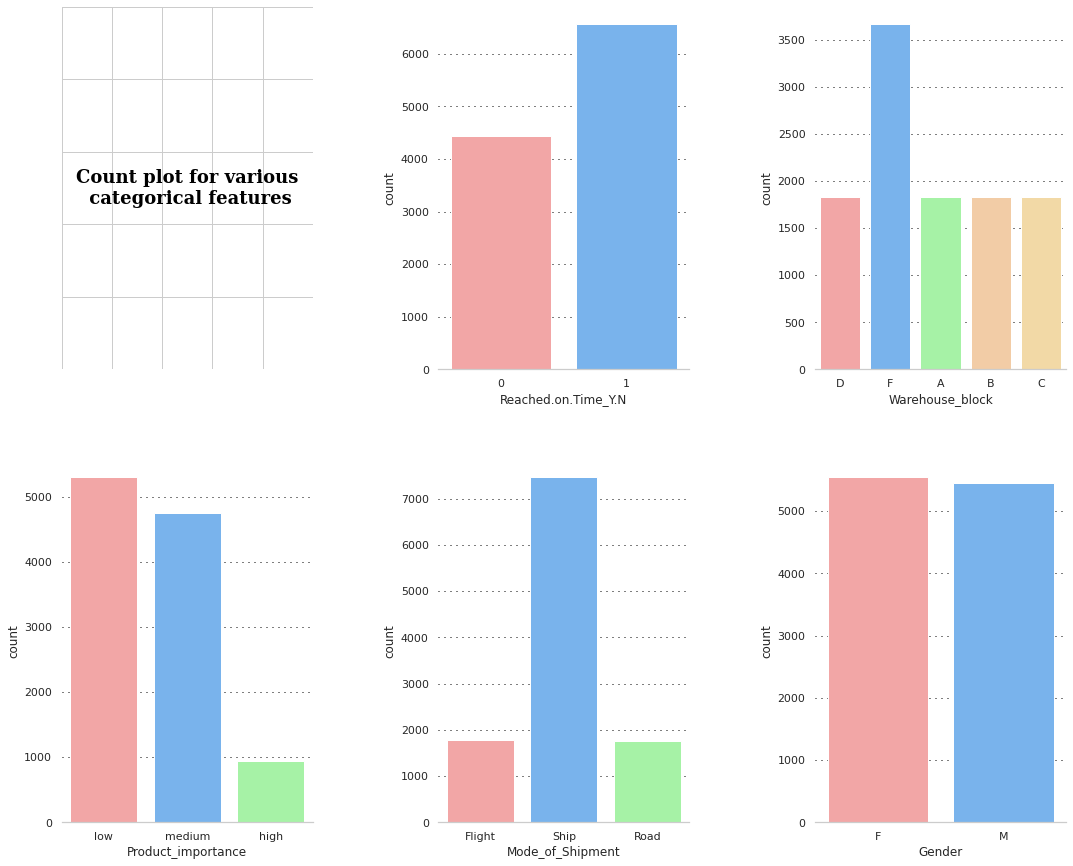

In [70]:
#Bar plots for categerical variables
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


background = "white"
color_palette = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffdd99']
fig.patch.set_facecolor(background) 
ax0.set_facecolor(background) 
ax1.set_facecolor(background) 
ax2.set_facecolor(background) 
ax3.set_facecolor(background) 
ax4.set_facecolor(background) 
ax5.set_facecolor(background) 

# Title of the plot
#Removing the border for the sides
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'Count plot for various\n categorical features',horizontalalignment='center',verticalalignment='center',fontsize=18, fontweight='bold',
         fontfamily='serif',color="#000000")
#Plot 1  ---> Count   of products reached on time
#for dashed lines parallel to x-axis
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#Ploting
sns.countplot(ax=ax1,data=df,x='Reached.on.Time_Y.N',palette=color_palette)

#Plot 2  ---> Count of  products shipped from differnt wareHouses
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='Warehouse_block',palette=color_palette)

#Plot 3  ---> Count of  products shipped with differnt  importance levels
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='Product_importance',palette=color_palette)

#Plot 4  ---> Count of  basesd on mode of shipment
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='Mode_of_Shipment',palette=color_palette)

#Plot 5  ---> Count of  purchases made by male and female
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='Gender',palette=color_palette)

#Removing borders for all the plots
for ii in ["top","left","right"]:
  ax1.spines[ii].set_visible(False)
  ax2.spines[ii].set_visible(False)
  ax3.spines[ii].set_visible(False)
  ax4.spines[ii].set_visible(False)
  ax5.spines[ii].set_visible(False)


***Information that we get from above plots is :***

*   Most the products reached the destination on time
*    More products  are stored in warehouse F than other warehouses
*   Most of the products are of low imporatance
*    Most of the products are shipped using ship transportation than flight or road
*   Female ordered more no.of products than Male



**Plots on continous variables**

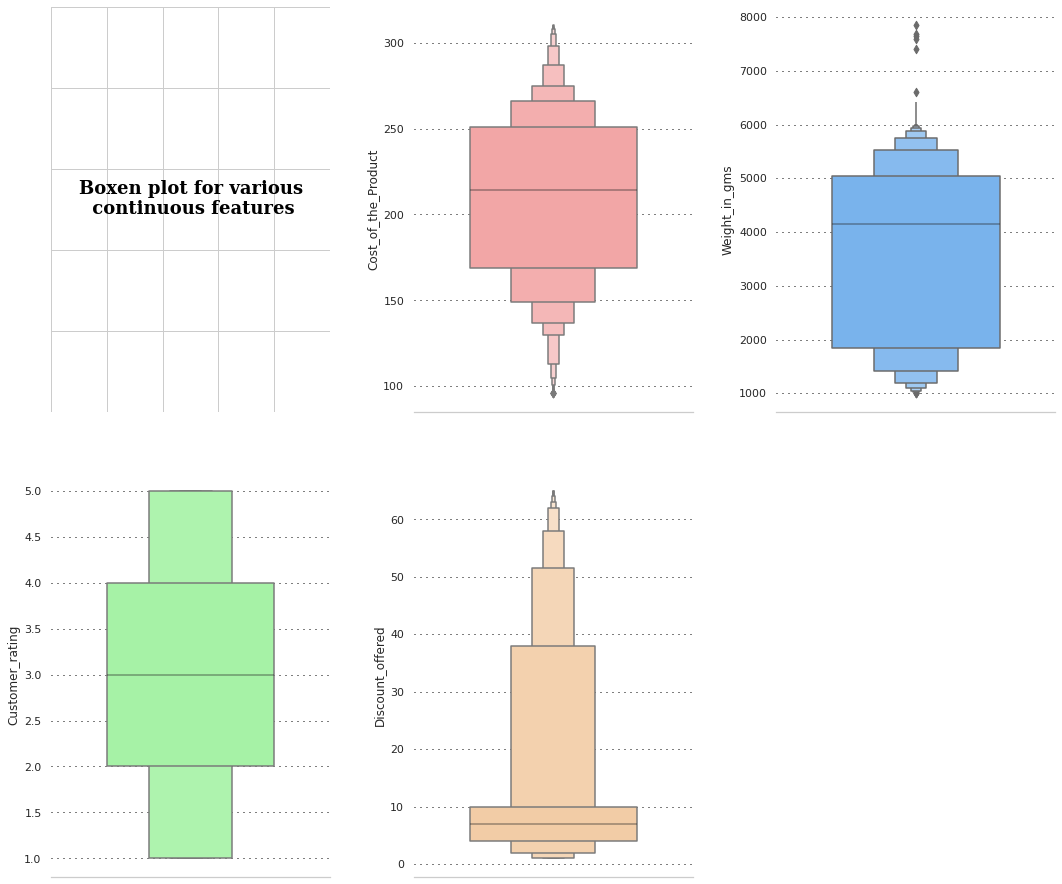

In [71]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

background = "white"
color_palette = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffdd99']
fig.patch.set_facecolor(background) 
ax0.set_facecolor(background) 
ax1.set_facecolor(background) 
ax2.set_facecolor(background) 
ax3.set_facecolor(background) 
ax4.set_facecolor(background) 
ax5.set_facecolor(background) 

#Removing the borders 
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'Boxen plot for various\n continuous features\n',horizontalalignment='center',verticalalignment='center',fontsize=18, fontweight='bold',
         fontfamily='serif',color="#000000")
#Plot 1--> Cost of product
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Cost_of_the_Product'],palette=['#ff9999'],width=0.6)

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['Weight_in_gms'],palette=['#66b3ff'],width=0.6)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['Customer_rating'],palette=['#99ff99'],width=0.6)

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['Discount_offered'],palette=['#ffcc99'],width=0.6)

for ii in ["top","left","right"]:
  ax1.spines[ii].set_visible(False)
  ax2.spines[ii].set_visible(False)
  ax3.spines[ii].set_visible(False)
  ax4.spines[ii].set_visible(False)



The above plots show how the data is distributed accross the median 

*** The information we get from the plots : ***

* Cost of the most of the products fall in the range from 170 to 250
* weight of the most of the products fall in the range from 2kg to 5kg
*  customer ratings here are evenly distributed from 1 to 5
* For most the products the discount offered is from 10 to 37
* We also can see the maximum and minimum values and median in differnt plots 



***To know about BoxPLot*** [click here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [72]:
#correlation for different continous variables
df_corr = df[con_cols].corr().transpose()
df_corr

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000


**Bivariate Analysis**

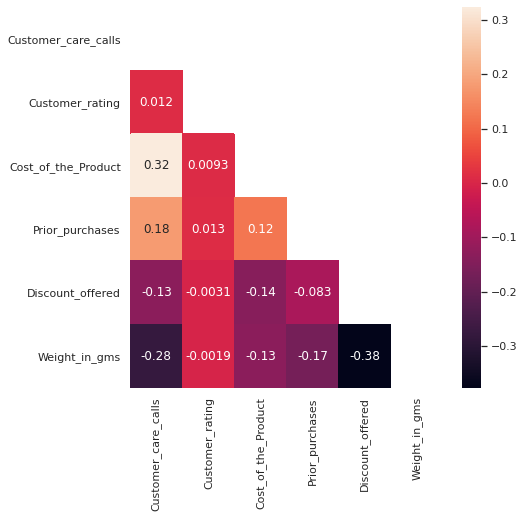

In [73]:
#Heat map for continous variables
fig=plt.figure(figsize=(7,7))
mask = np.triu(np.ones_like(df_corr))
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,annot=True)

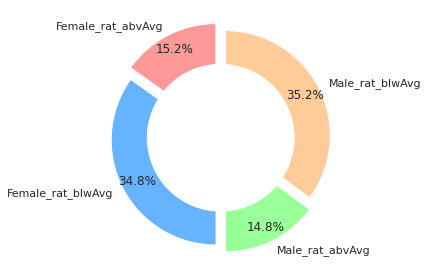

In [74]:
avg_cust_rating=sum(df['Customer_rating'])//len(df['Customer_rating'])
totLen=len(df)
fe=df.loc[(df['Gender']=='F') & (df['Customer_rating']>avg_cust_rating)].value_counts()
totFe=len(df['Gender']=='F')
ma=df.loc[(df['Gender']=='M') & (df['Customer_rating']>avg_cust_rating)].value_counts()
totMa=len(df['Gender']=='M')


rating = ['Female_rat_abvAvg', 'Female_rat_blwAvg', 'Male_rat_abvAvg',
         'Male_rat_blwAvg']
data = [len(fe)/totLen,(totFe-len(fe))/totLen,len(ma)/totLen,(totMa-len(ma))/totLen]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.1,0.05,0.1,0.05)
 
plt.pie(data, colors = colors, labels=rating, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

From this pie chart we can observe that from the total ratings **30%** are **above average** ratings i.e, they are greater than 2.99.In this 30% Male and Female almost equally given rating greater than the average

In [75]:
reac_fli=len(df.loc[(df['Mode_of_Shipment']=='Flight') & (df['Reached.on.Time_Y.N']==1)])
Not_reac_fli=len(df.loc[(df['Mode_of_Shipment']=='Flight') & (df['Reached.on.Time_Y.N']==0)])
reac_ship=len(df.loc[(df['Mode_of_Shipment']=='Ship') & (df['Reached.on.Time_Y.N']==1)])
Not_reac_Ship=len(df.loc[(df['Mode_of_Shipment']=='Ship') & (df['Reached.on.Time_Y.N']==0)])
reac_road=len(df.loc[(df['Mode_of_Shipment']=='Road') & (df['Reached.on.Time_Y.N']==1)])
Not_reac_Road=len(df.loc[(df['Mode_of_Shipment']=='Road') & (df['Reached.on.Time_Y.N']==0)])


data_obt=pd.DataFrame({'Flight':[reac_fli,Not_reac_fli],'Ship':[reac_ship,Not_reac_Ship],'Road':[reac_road,Not_reac_Road]},index=["Reached_on_time","Not_reached_on_time"])
data_obt


,Flight,Ship,Road
Reached_on_time,1069,4459,1035
Not_reached_on_time,708,3003,725


<Figure size 1440x1440 with 0 Axes>

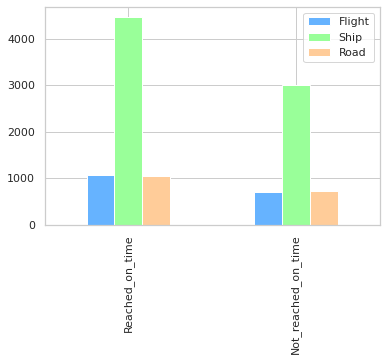

In [76]:
fig=plt.figure(figsize=(20,20))
data_obt.plot(kind="bar",color=['#66b3ff','#99ff99','#ffcc99'])


The above plot shows how many products are delivered on time with different modes of shipment.From the plot we can observe that with ship transporatation the products reached on time when compared to flights and road transporation